# Assignment #D: Mock Exam

Updated 1955 GMT+8 Dec 5, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>



>**说明：**
>
>1. Dec⽉考： AC3<mark>（请改为同学的通过数）</mark> 。考试题⽬都在“题库（包括计概、数算题目）”⾥⾯，按照数字题号能找到，可以重新提交。作业中提交⾃⼰最满意版本的代码和截图。
>
>2. 解题与记录：对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>3. 提交安排：提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>4. 延迟提交：如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。





## 1. 题目

### E02734:十进制到八进制 

http://cs101.openjudge.cn/practice/02734

思路：



代码

```python
a=int(input())
b=''
while a!=0:

    b=str(a%8)+b
    a=a//8
print(b)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
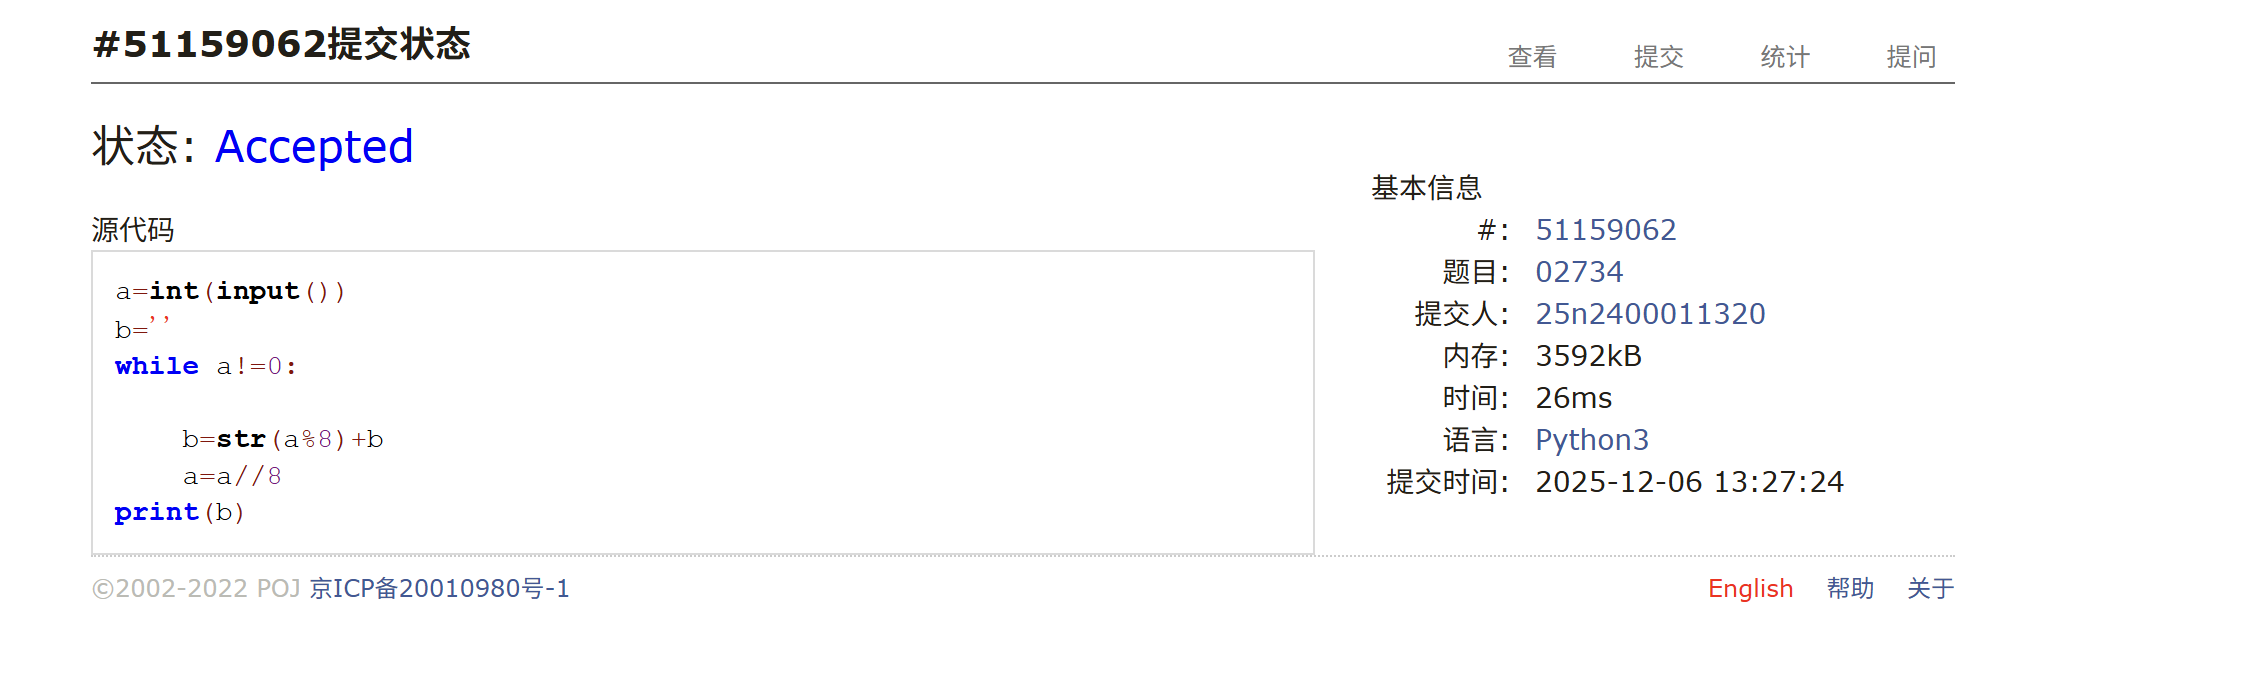




### M21509:序列的中位数

heap, http://cs101.openjudge.cn/practice/21509

思路：



代码

```python
from heapq import *
A=[]#小的一半的相反数，从而堆顶是小的一半中最大数的相反数
B=[]
def add(num):
    if len(A)>len(B):
        heappush(A,-num)
        heappush(B,-heappop(A))
    else:
        heappush(B,num)
        heappush(A,-heappop(B))

n=int(input().strip())
l=list(map(int,input().strip().split()))
i=0
while i<n:
    add(l[i])
    if i%2==0:
        if len(A)==len(B):
            m=(B[0]-A[0])/2
        else:
            m=-A[0]
        print(m)
    i+=1
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
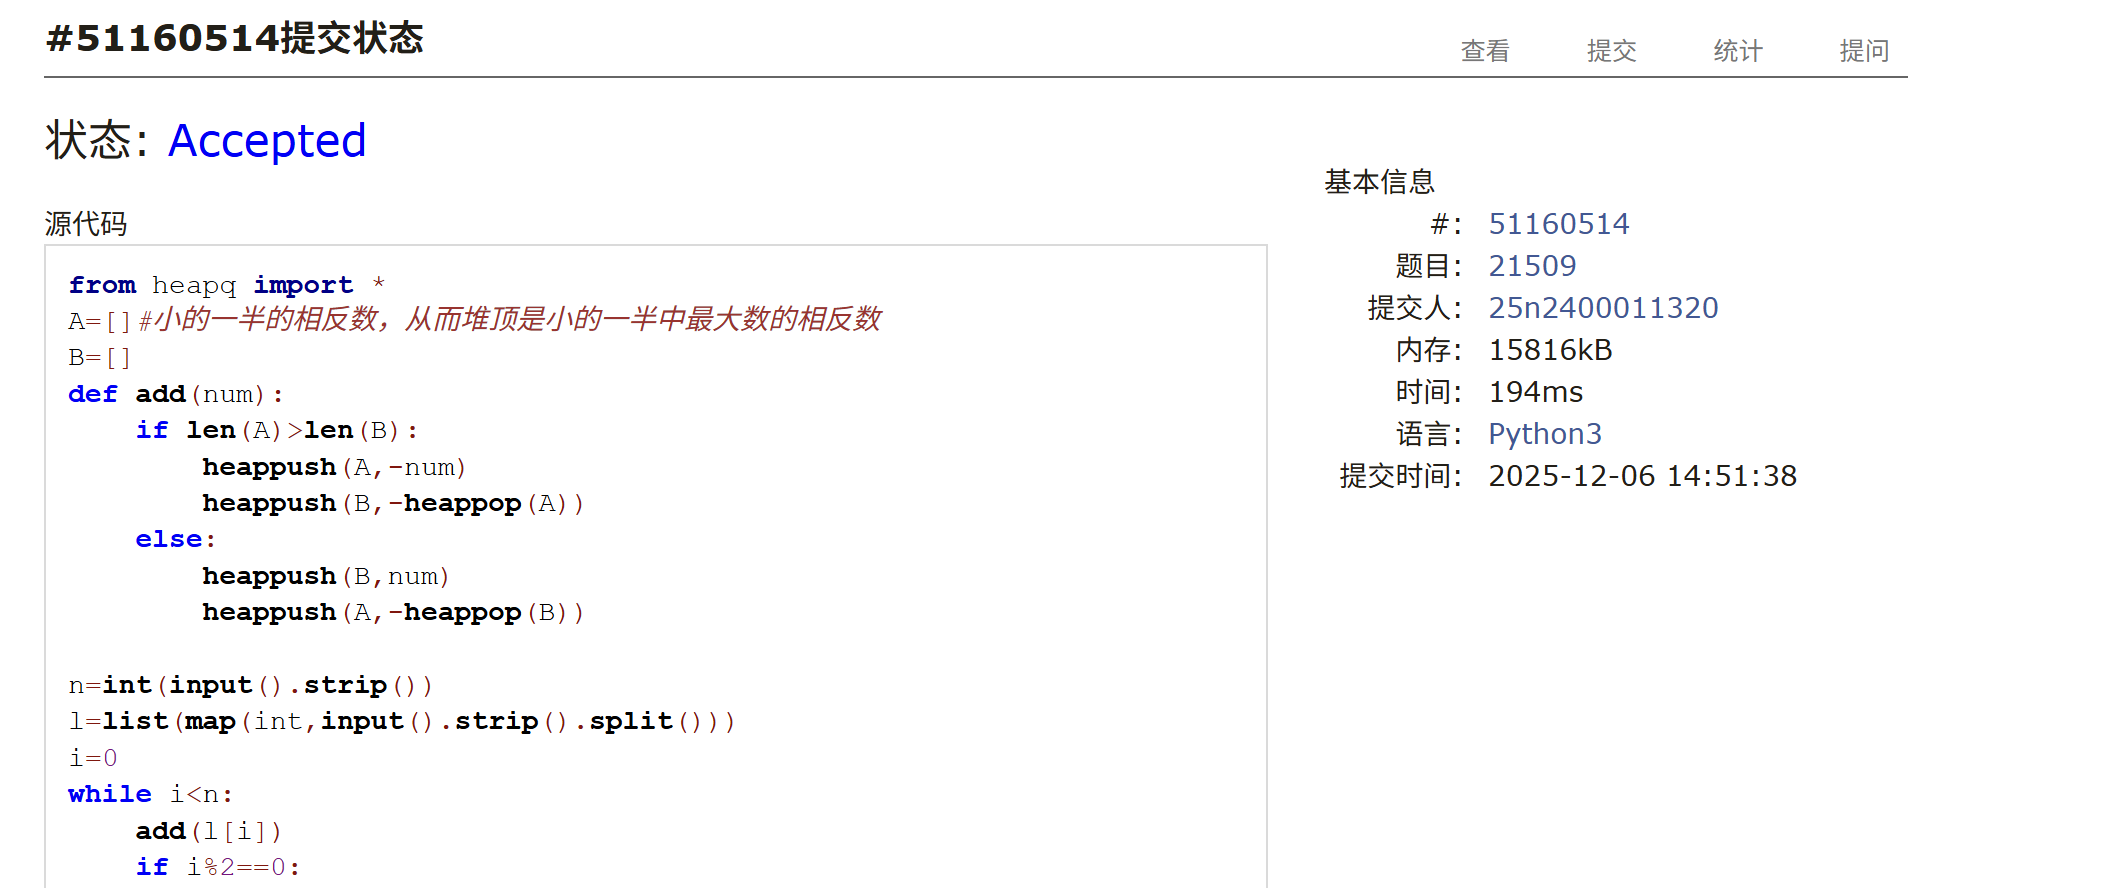




### M27306: 植物观察

disjoint set, bfs, http://cs101.openjudge.cn/practice/27306/

思路：



代码

```python
n,m=map(int,input().split())
ans=[]
for _ in range(m):
    ans.append(list(map(int,input().split())))
A={}
B={}
answer=1
while ans:
    judge=0
    i=0
    while i<len(ans):
        a,b,j=ans[i]
        if a in A:
            judge=1
            if j:
                B[b]=1
                if b in A:
                    answer=0
            else:
                A[b]=1
                if b in B:
                    answer=0
            del ans[i]
            continue

        if a in B:
            judge=1
            if j:
                A[b]=1
                if b in B:
                    answer=0
            else:
                B[b]=1
                if b in A:
                    answer=0
            del ans[i]
            continue

        if b in A:
            judge=1
            if j:
                B[a]=1
                if a in A:
                    answer=0
            else:
                A[a]=1
                if a in B:
                    answer=0
            del ans[i]
            continue
        if b in B:
            judge = 1
            if j:
                A[a] = 1
                if a in B:
                    answer=0
            else:
                B[a] = 1
                if a in A:
                    answer=0
            del ans[i]
            continue
        i+=1
    if judge==0:
        jud=0
        for i in range(len(ans)):
            a,b,j=ans[i]
            if j:
                A[a]=1
                B[b]=1
                jud=1
                del ans[i]
                break
        if jud==0:
            break

if answer:
    print("YES")
else:
    print("NO")
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
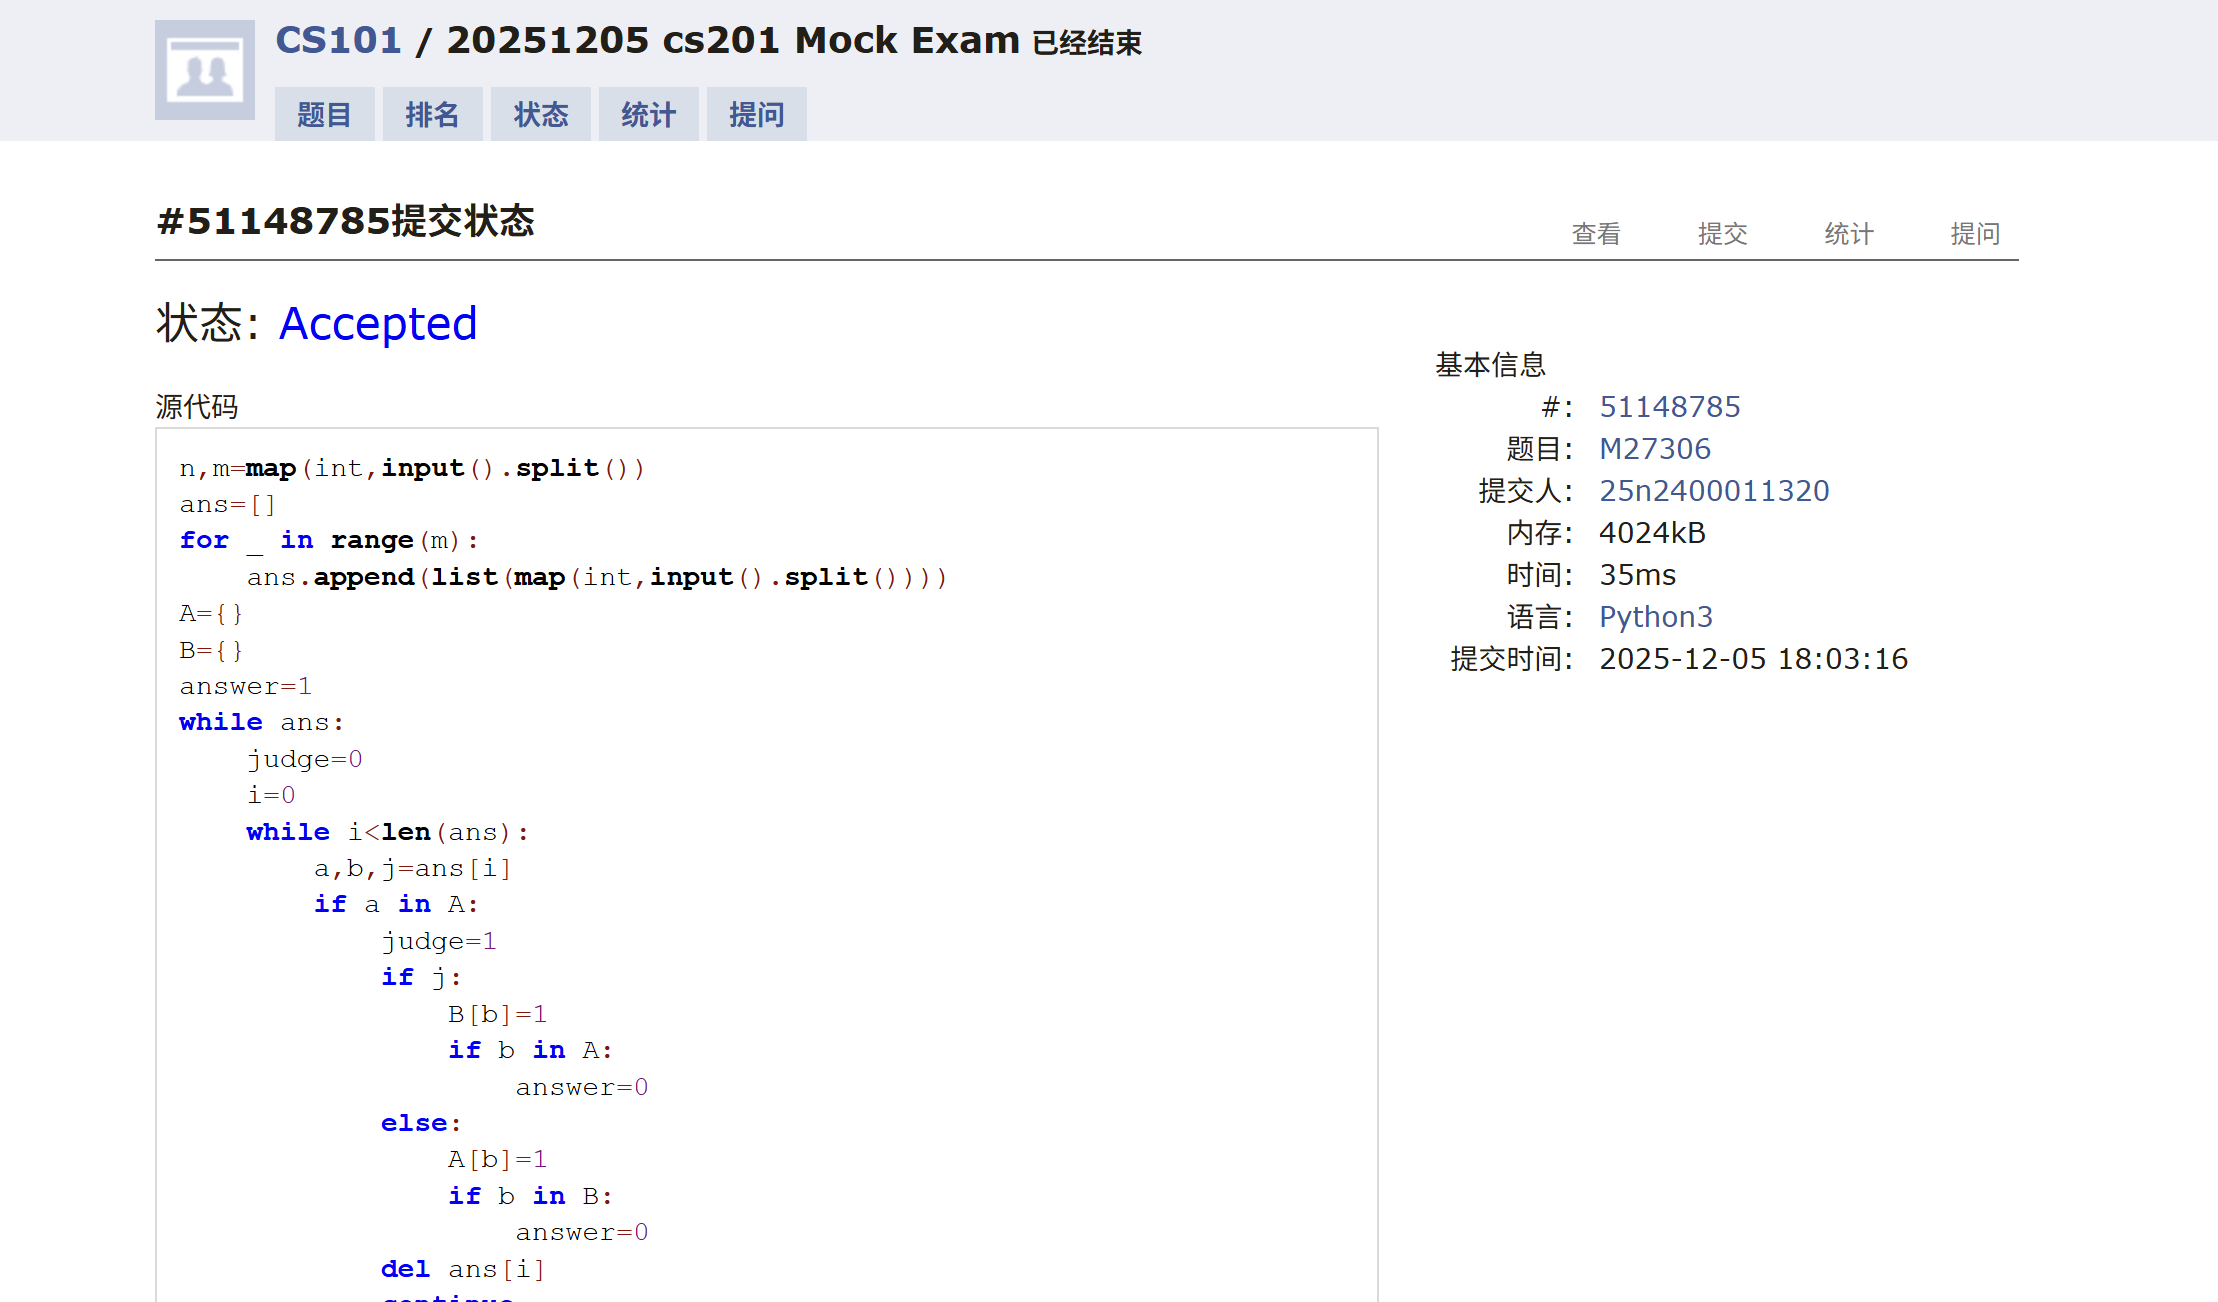




### M29740:神经网络

Topological order, http://cs101.openjudge.cn/practice/29740/


思路：
本题一开始看错了两处，后面修改的时候还有地方漏改了，感觉修改特别容易漏。


代码

```python
from collections import deque,defaultdict
n,p=map(int,input().strip().split())
graph=defaultdict(int)
l=[]
rudu=[0]*n
chudu=[0]*n

for _ in range(n):
    l.append(list(map(int,input().strip().split())))

for _ in range(p):
    a,b,c=map(int,input().strip().split())
    if (a-1,b-1) not in graph:
            rudu[b-1]+=1
            chudu[a-1]+=1
    graph[(a-1,b-1)]+=c



q=deque()
to_ans=[]
count=0
for i in range(n):
    if rudu[i]==0:
        q.append(i)
        count+=1

    if chudu[i]==0:
        to_ans.append(i)

while q:
    i=q.popleft()
    for j in range(n):
        if (i,j) in graph:
            if l[i][0]>0:
                l[j][0]+=graph[(i,j)]*l[i][0]
            rudu[j]-=1
            if rudu[j]==0:
                count+=1
                q.append(j)
                l[j][0]-=l[j][1]

i=0
while i<len(to_ans):
    if l[to_ans[i]][0]<=0:
        del to_ans[i]
        i-=1
    i+=1
if count==n and to_ans:
    for i in to_ans:
        print(*[i+1,l[i][0]])
else:
    print('NULL')
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
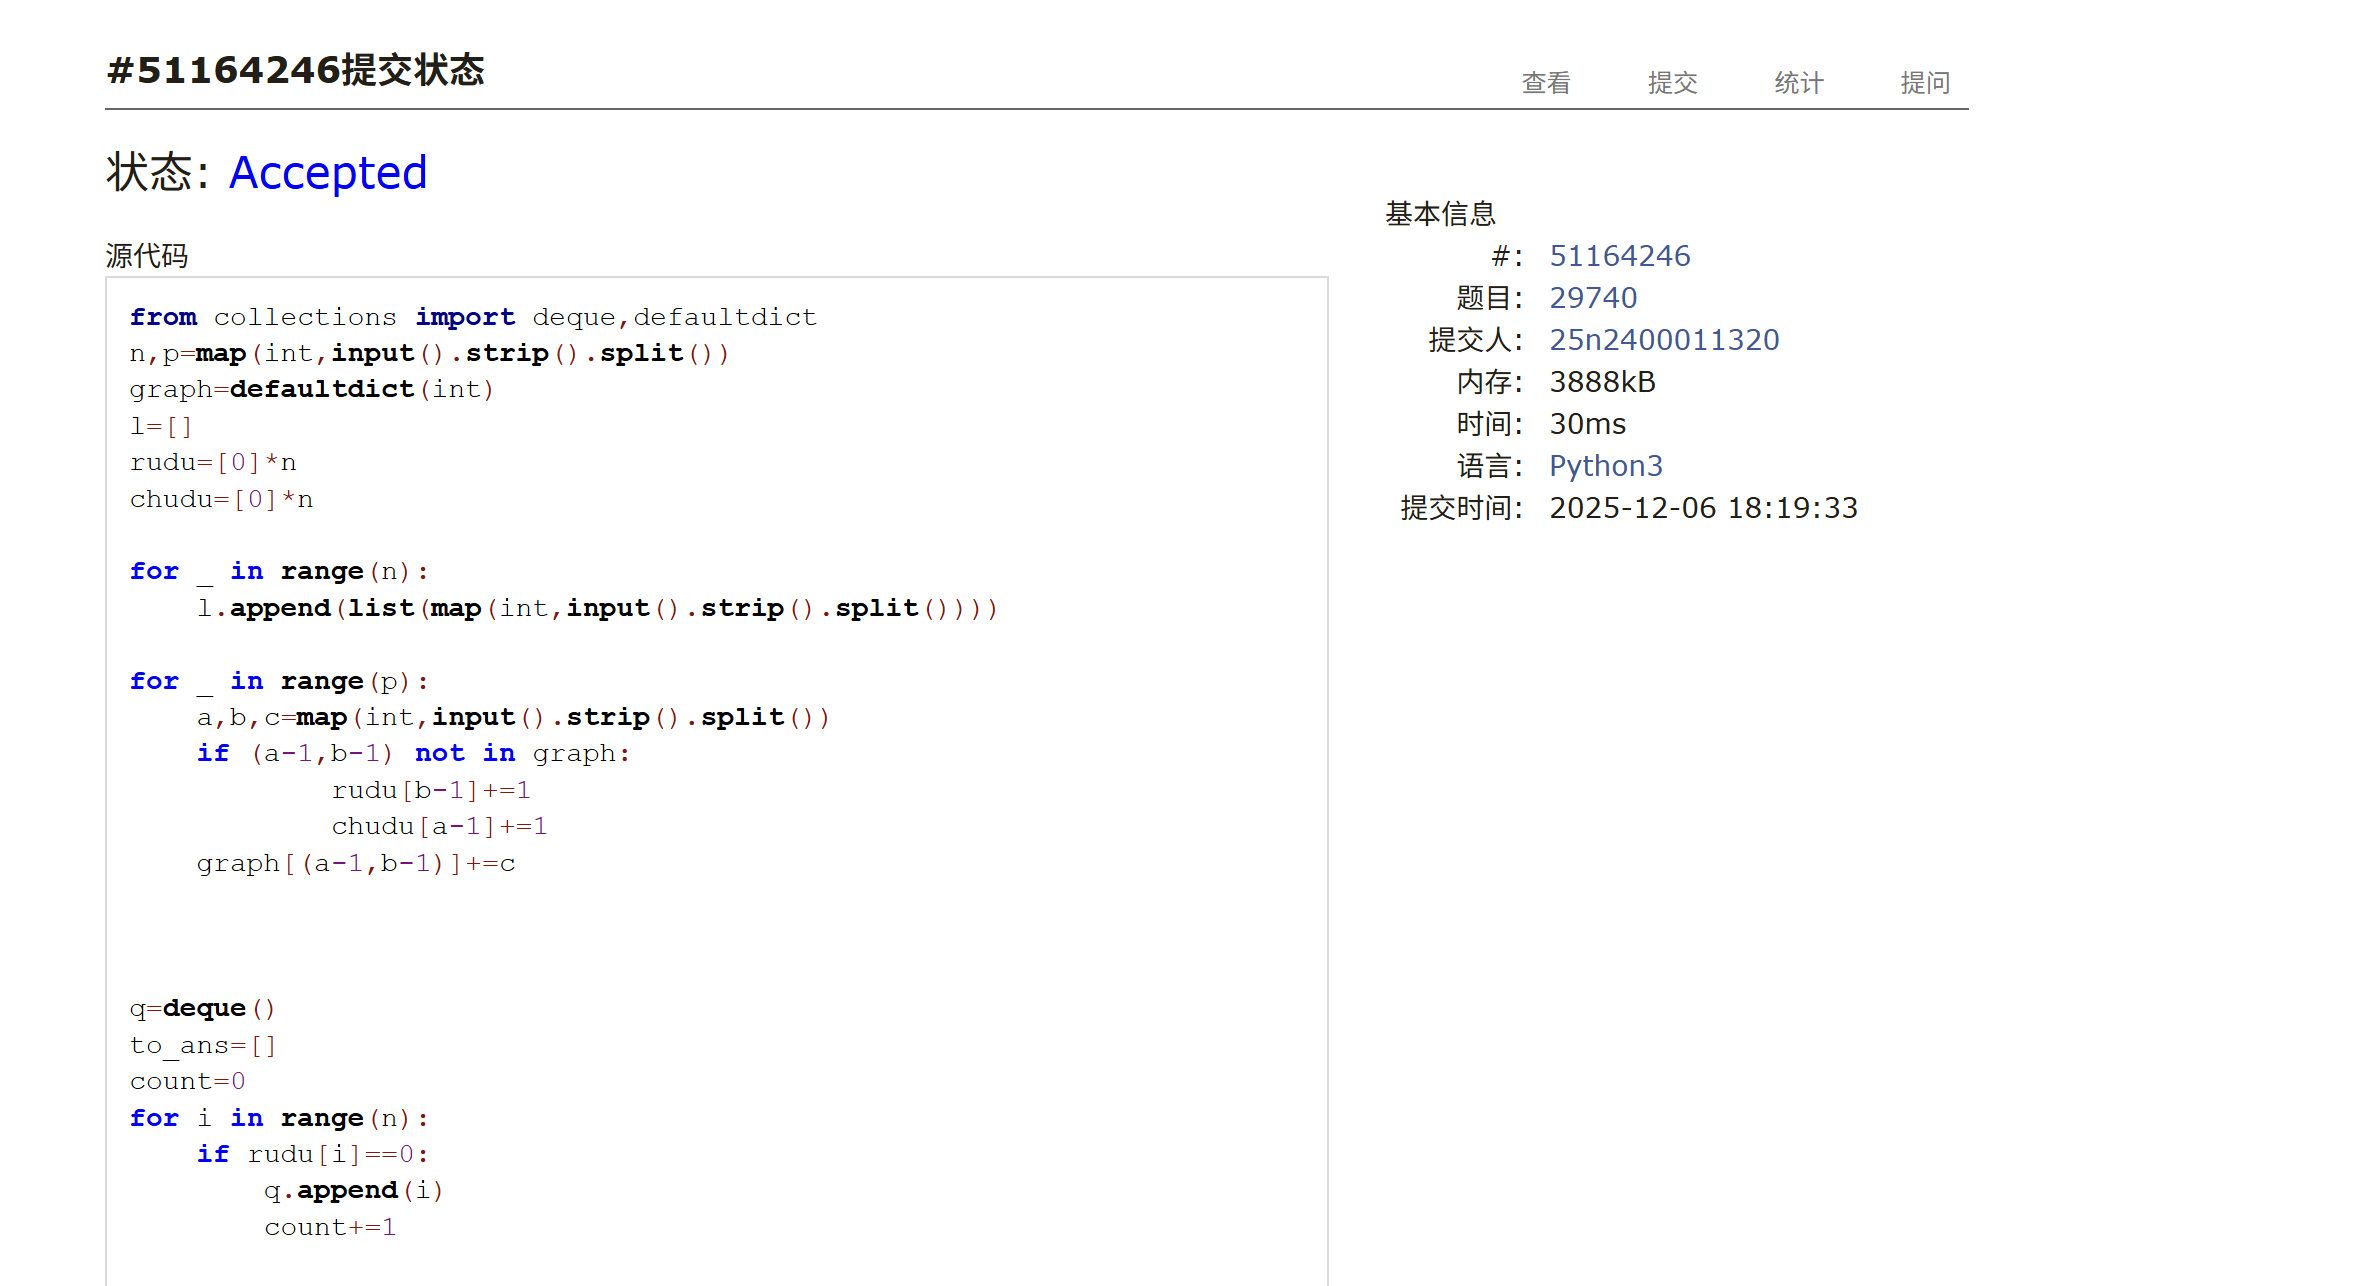




### T27351:01最小生成树 

mst, http://cs101.openjudge.cn/practice/27351/

思路：



代码

```python

```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>





### T30193:哈密顿激活层

DFS+剪枝, http://cs101.openjudge.cn/practice/30193/

思路：



代码

```python

```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>





## 2. 学习总结和收获

神经网络那题一开始看漏了两个条件，后来修改的时候修改不完全，浪费了大量时间，感觉这是非常常见的错误原因，必须格外小心漏看条件和看见条件后修改不完全这两个问题。




